Aprèn a realitzar test d'hipòtesis amb Python.  

- Objectius:  
Calcular el p-valor de diferents variable o conjunt de variables  
Interpretar el p-valor i dir si rebutja la hipòtesi nul·la  

###### Llibreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport

### Nivell 1
#### Exercici 1
Agafa un conjunt de dades del tema que t'agradi i selecciona un atribut del conjunt de dades.  
Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

### Base de dades  
Hem triat una base de dades de basquet ('NBA Players stats since 1950', https://www.kaggle.com/drgilermo/nba-players-stats).    És una base de dades amb més de 50 columnes, per tant les anirem definint en tant que les fem servir pels propòsits dels   exercicis.

### Hipòtesi:  

H0 = El percentatge mig de tirs lliures(FT) a l'NBA per jugador és igual al 0.5. - H0: μFT = 0.5  
HA = El percentatge mig de tirs lliures a l'NBA per jugador està per sobre 0.5.  - HA: μFT > 0.5  
Posarem el nivell de significació al 5%.                                           α = 0.05  

La hipòtesi nul·la sempre és la nostra suposició inicial, en aquest cas que els jugadors de la NBA, al ser de la lliga de basquet competitiu més important del món, tindrán un percentatge d'encert de tirs lliures superior al 50%.

Per tal d'acceptar la hipòtesi alternativa, hem de trobar evidències suficients per refutar la hipòtesi nul·la. Fent estadística, les dades són l'evidència.  

Com a jurats, al final haurem de prendre una decisió basada en l'evidència disponible. Com a estadístics o be 'rebutjarem la hipòtesi nul·la', o bé 'fracassarem en rebutjar la hipòtesi nul·la'.

In [381]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

path = 'Seasons_Stats.csv'

df = pd.read_csv(path)
df

Unnamed: 0    Year             Player  Pos   Age   Tm     G    GS      MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  blanl  OWS  DWS   WS  WS/48  blank2  OBPM  DBPM  BPM  VORP     FG    FGA    FG%    3P   3PA    3P%     2P    2PA    2P%   eFG%     FT    FTA    FT%    ORB    DRB    TRB    AST   STL   BLK   TOV     PF    PTS
0               0  1950.0    Curly Armstrong  G-F  31.0  FTW  63.0   NaN     NaN   NaN  0.368    NaN  0.467   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN -0.1  3.6  3.5    NaN     NaN   NaN   NaN  NaN   NaN  144.0  516.0  0.279   NaN   NaN    NaN  144.0  516.0  0.279  0.279  170.0  241.0  0.705    NaN    NaN    NaN  176.0   NaN   NaN   NaN  217.0  458.0
1               1  1950.0       Cliff Barker   SG  29.0  INO  49.0   NaN     NaN   NaN  0.435    NaN  0.387   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  1.6  0.6  2.2    NaN     NaN   NaN   NaN  NaN   NaN  102.0  274.0  0.372   NaN   NaN    NaN  102.0  274.0  0.372  0.372   75.0  106.0  0.708    NaN    NaN    NaN  109.0   NaN   NaN   NaN   99.0  279.0
2               2  1950.0      Leo Barnhorst   SF  25.0  CHS  67.0   NaN     NaN   NaN  0.394    NaN  0.259   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  0.9  2.8  3.6    NaN     NaN   NaN   NaN  NaN   NaN  174.0  499.0  0.349   NaN   NaN    NaN  174.0  499.0  0.349  0.349   90.0  129.0  0.698    NaN    NaN    NaN  140.0   NaN   NaN   NaN  192.0  438.0
3               3  1950.0         Ed Bartels    F  24.0  TOT  15.0   NaN     NaN   NaN  0.312    NaN  0.395   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN -0.5 -0.1 -0.6    NaN     NaN   NaN   NaN  NaN   NaN   22.0   86.0  0.256   NaN   NaN    NaN   22.0   86.0  0.256  0.256   19.0   34.0  0.559    NaN    NaN    NaN   20.0   NaN   NaN   NaN   29.0   63.0
4               4  1950.0         Ed Bartels    F  24.0  DNN  13.0   NaN     NaN   NaN  0.308    NaN  0.378   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN -0.5 -0.1 -0.6    NaN     NaN   NaN   NaN  NaN   NaN   21.0   82.0  0.256   NaN   NaN    NaN   21.0   82.0  0.256  0.256   17.0   31.0  0.548    NaN    NaN    NaN   20.0   NaN   NaN   NaN   27.0   59.0
...           ...     ...                ...  ...   ...  ...   ...   ...     ...   ...    ...    ...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...  ...  ...    ...     ...   ...   ...  ...   ...    ...    ...    ...   ...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   ...   ...   ...    ...    ...
24686       24686  2017.0        Cody Zeller   PF  24.0  CHO  62.0  58.0  1725.0  16.7  0.604  0.002  0.442   8.6  17.3  12.9   9.1   1.8   3.0  10.9  15.5    NaN  3.4  2.2  5.6  0.157     NaN  -0.2   2.3  2.1   1.8  253.0  443.0  0.571   0.0   1.0  0.000  253.0  442.0  0.572  0.571  133.0  196.0  0.679  135.0  270.0  405.0   99.0  62.0  58.0  65.0  189.0  639.0
24687       24687  2017.0       Tyler Zeller    C  27.0  BOS  51.0   5.0   525.0  13.0  0.508  0.006  0.247   9.2  17.0  13.2  12.2   0.7   3.3  10.2  16.5    NaN  0.5  0.6  1.0  0.094     NaN  -3.2   0.8 -2.5  -0.1   78.0  158.0  0.494   0.0   1.0  0.000   78.0  157.0  0.497  0.494   22.0   39.0  0.564   43.0   81.0  124.0   42.0   7.0  21.0  20.0   61.0  178.0
24688       24688  2017.0  Stephen Zimmerman    C  20.0  ORL  19.0   0.0   108.0   7.3  0.346  0.000  0.161  10.8  24.9  17.6   5.3   0.9   3.7   8.3  14.8    NaN -0.1  0.1  0.0 -0.005     NaN  -7.8   0.4 -7.3  -0.1   10.0   31.0  0.323   0.0   0.0    NaN   10.0   31.0  0.323  0.323    3.0    5.0  0.600   11.0   24.0   35.0    4.0   2.0   5.0   3.0   17.0   23.0
24689       24689  2017.0        Paul Zipser   SF  22.0  CHI  44.0  18.0   843.0   6.9  0.503  0.448  0.181   1.9  14.2   8.0   6.1   0.9   1.5  14.4  14.4    NaN -0.3  0.8  0.5  0.030     NaN  -3.6  -0.1 -3.7  -0.4   88.0  221.0  0.398  33.0  99.0  0.333   55.0  122.0  0.451  0.473   31.0   40.0  0.775   15.0  110.0  125.0   36.0  15.0  16.0  40.0   78.0

### Exploració

In [3]:
profile = ProfileReport(df, minimal=True)
profile

Summarize dataset:   0%|          | 0/61 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [237]:
df.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'], dtype='object')

In [238]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [239]:
df.drop(['blanl', 'blank2'], axis=1, inplace = True)

In [240]:
df['Tm'].unique()

array(['FTW', 'INO', 'CHS', 'TOT', 'DNN', 'NYK', 'TRI', 'AND', 'PHW',
       'WAT', 'SHE', 'ROC', 'BLB', 'MNL', 'SYR', 'WSC', 'BOS', 'STB', nan,
       'MLH', 'STL', 'DET', 'CIN', 'LAL', 'CHP', 'SFW', 'CHZ', 'BAL',
       'PHI', 'CHI', 'SDR', 'SEA', 'MIL', 'ATL', 'PHO', 'POR', 'CLE',
       'BUF', 'HOU', 'GSW', 'KCO', 'CAP', 'NOJ', 'WSB', 'KCK', 'IND',
       'NYN', 'DEN', 'SAS', 'NJN', 'SDC', 'UTA', 'DAL', 'LAC', 'SAC',
       'CHH', 'MIA', 'ORL', 'MIN', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH',
       'CHA', 'NOK', 'OKC', 'BRK', 'NOP', 'CHO'], dtype=object)

In [241]:
# Variables categòriques:

df.loc[:,df.dtypes==np.object]

<ipython-input-241-4e1ad8815d62>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.loc[:,df.dtypes==np.object]


Player  Pos   Tm
0        Curly Armstrong  G-F  FTW
1           Cliff Barker   SG  INO
2          Leo Barnhorst   SF  CHS
3             Ed Bartels    F  TOT
4             Ed Bartels    F  DNN
...                  ...  ...  ...
24686        Cody Zeller   PF  CHO
24687       Tyler Zeller    C  BOS
24688  Stephen Zimmerman    C  ORL
24689        Paul Zipser   SF  CHI
24690        Ivica Zubac    C  LAL

[24691 rows x 3 columns]

In [242]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [243]:
numeric_data.shape

(24691, 47)

In [244]:
categorical_data.shape

(24691, 3)

In [245]:
numeric_data.describe().transpose()

count         mean         std       min       25%       50%       75%       max
Year   24624.0  1992.594989   17.429594  1950.000  1981.000  1996.000  2007.000  2017.000
Age    24616.0    26.664405    3.841892    18.000    24.000    26.000    29.000    44.000
G      24624.0    50.837110   26.496161     1.000    27.000    58.000    75.000    88.000
GS     18233.0    23.593375   28.632387     0.000     0.000     8.000    45.000    83.000
MP     24138.0  1209.720317  941.146575     0.000   340.000  1053.000  1971.000  3882.000
PER    24101.0    12.479071    6.039014   -90.600     9.800    12.700    15.600   129.100
TS%    24538.0     0.493001    0.094469     0.000     0.458     0.506     0.544     1.136
3PAr   18839.0     0.158604    0.187495     0.000     0.005     0.064     0.288     1.000
FTr    24525.0     0.325455    0.218971     0.000     0.208     0.296     0.400     6.000
ORB%   20792.0     6.181565    4.872685     0.000     2.600     5.400     9.000   100.000
DRB%   20792.0    13.708657    6.636402     0.000     8.800    12.700    18.100   100.000
TRB%   21571.0     9.949210    5.040283     0.000     5.900     9.200    13.500   100.000
AST%   22555.0    13.009962    9.191843     0.000     6.500    10.500    17.600   100.000
STL%   20792.0     1.648269    1.017024     0.000     1.100     1.500     2.100    24.200
BLK%   20792.0     1.410624    1.773348     0.000     0.300     0.900     1.900    77.800
TOV%   19582.0    15.085099    6.919170     0.000    11.400    14.200    17.700   100.000
USG%   19640.0    18.906492    5.448157     0.000    15.400    18.600    22.200   100.000
OWS    24585.0     1.257307    2.136256    -5.100    -0.100     0.400     1.900    18.300
DWS    24585.0     1.227395    1.269613    -1.000     0.200     0.800     1.800    16.000
WS     24585.0     2.485796    3.058638    -2.800     0.200     1.400     3.800    25.400
WS/48  24101.0     0.065002    0.102471    -2.519     0.031     0.075     0.115     2.123
OBPM   20797.0    -1.778386    3.792947   -73.800    -3.400    -1.500     0.300    47.800
DBPM   20797.0    -0.548570    2.253106   -30.400    -1.700    -0.500     0.700    46.800
BPM    20797.0    -2.326720    4.691619   -86.700    -4.200    -1.800     0.300    36.200
VORP   20797.0     0.559879    1.336892    -2.600    -0.200     0.000     0.900    12.400
FG     24624.0   195.325820  188.114361     0.000    41.000   141.000   299.000  1597.000
FGA    24624.0   430.645752  397.624715     0.000    99.000   321.000   661.000  3159.000
FG%    24525.0     0.430817    0.095921     0.000     0.393     0.439     0.480     1.000
3P     18927.0    22.215037   38.543366     0.000     0.000     2.000    27.000   402.000
3PA    18927.0    63.604480  102.442769     0.000     1.000    11.000    84.000   886.000
3P%    15416.0     0.248796    0.176683     0.000     0.100     0.292     0.363     1.000
2P     24624.0   178.250447  179.478923     0.000    35.000   122.000   268.000  1597.000
2PA    24624.0   381.756782  371.260335     0.000    82.000   270.000   579.250  3159.000
2P%    24496.0     0.445343    0.099803     0.000     0.407     0.456     0.496     1.000
eFG%   24525.0     0.450658    0.099200     0.000     0.414     0.463     0.501     1.500
FT     24624.0   102.389336  113.373565     0.000    18.000    63.000   149.000   840.000
FTA    24624.0   136.775219  146.078918     0.000    27.000    88.000   201.000  1363.000
FT%    23766.0     0.719279    0.141824     0.000     0.657     0.743     0.808     1.000
ORB    20797.0    62.189210   67.324881     0.000    12.000    38.000    91.000   587.000
DRB    20797.0   147.199404  145.921912     0.000    33.000   106.000   212.000  1111.000
TRB    24312.0   224.637381  228.190203     0.000    51.000   159.000   322.000  2149.000
AST    24624.0   114.852623  135.863913     0.000    19.000    68.000   160.000  1164.000
STL    20797.0    39.897052   38.713053     0.000     9.000    29.000    60.000   301.000
BLK    20797.0    24.470260   36.935084     0.000

C:\Users\ab\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


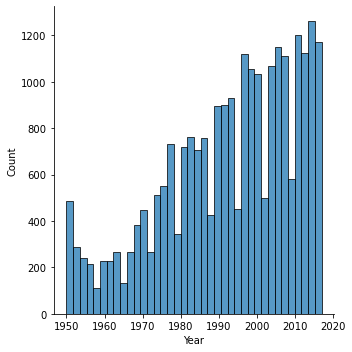

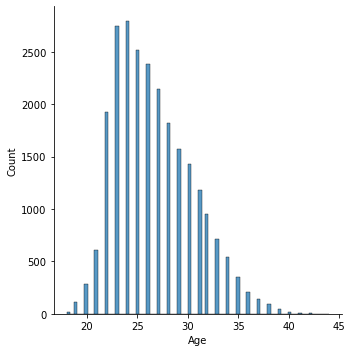

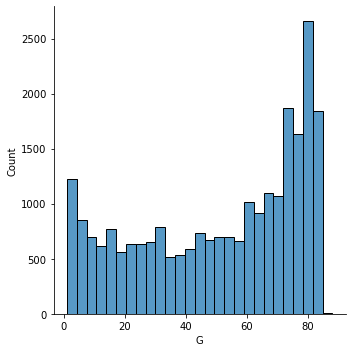

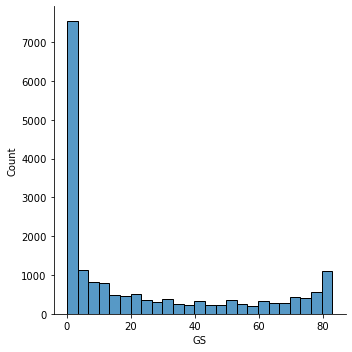

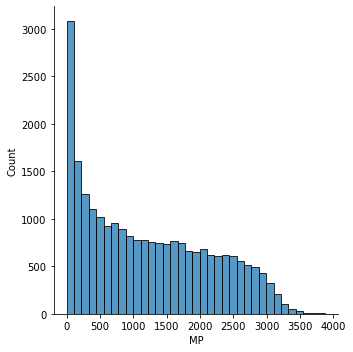

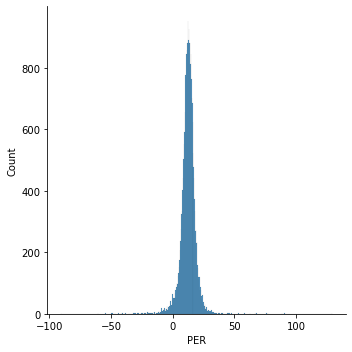

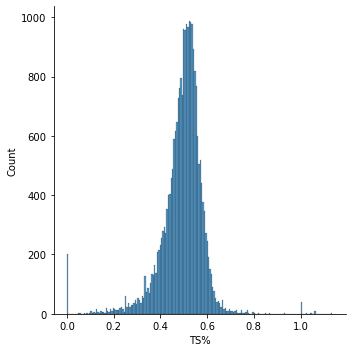

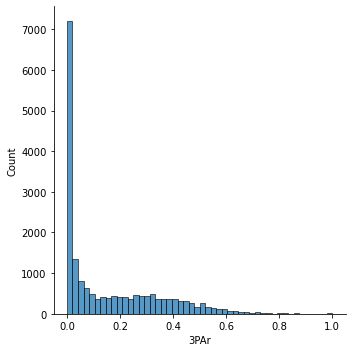

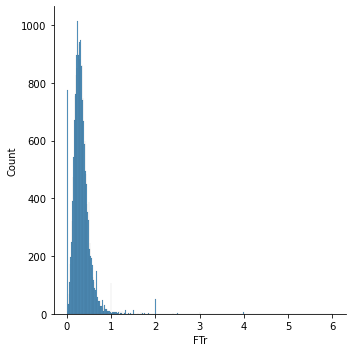

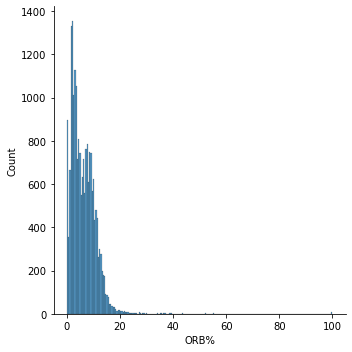

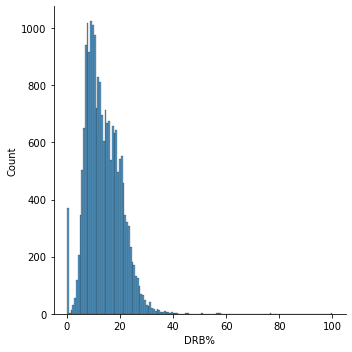

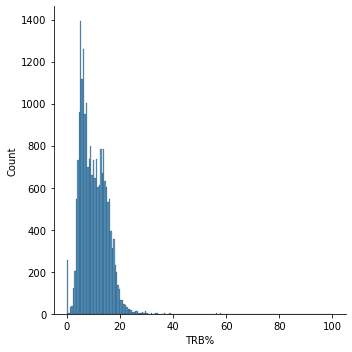

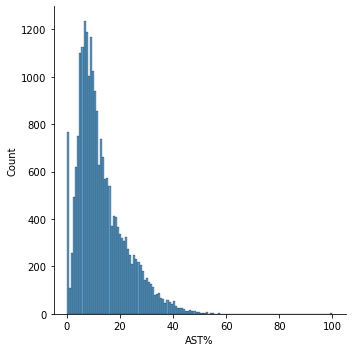

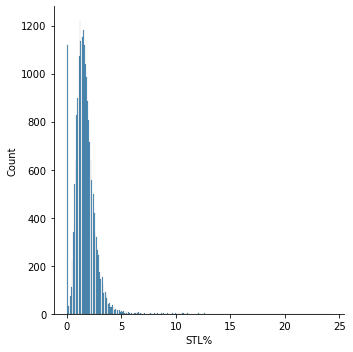

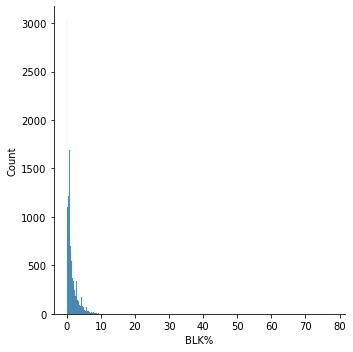

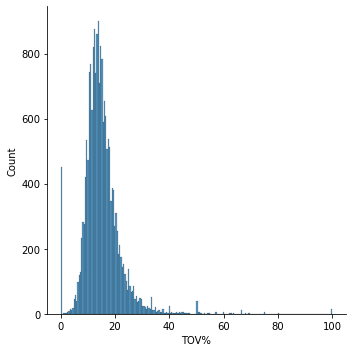

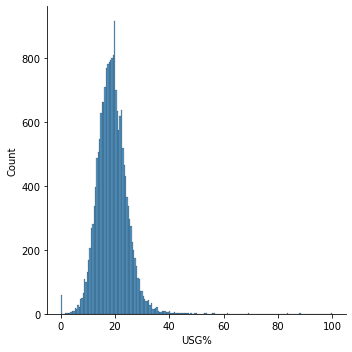

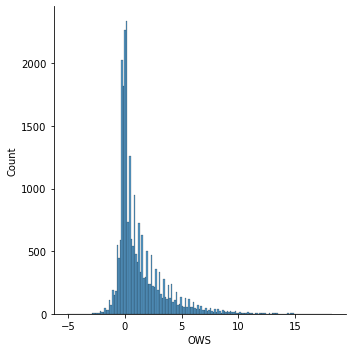

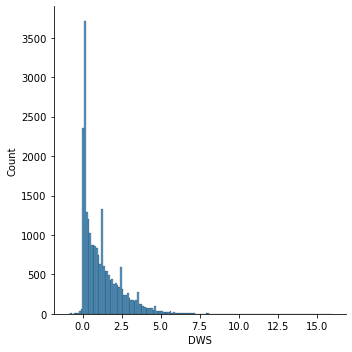

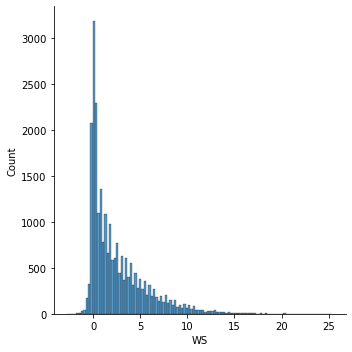

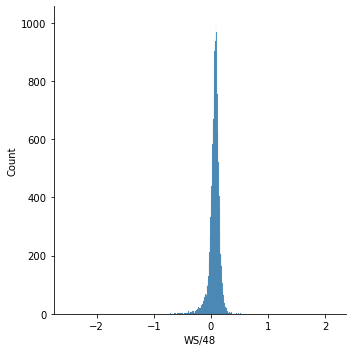

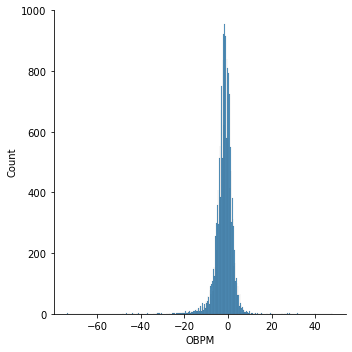

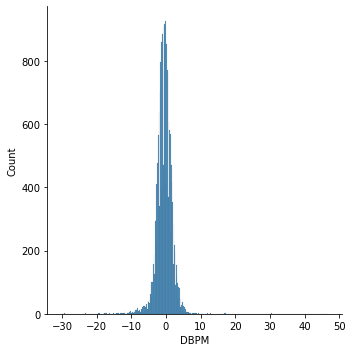

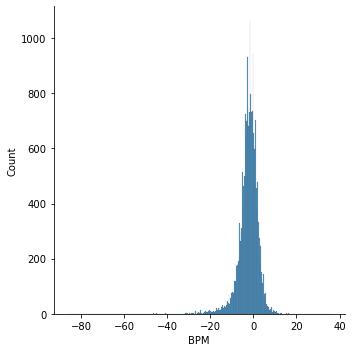

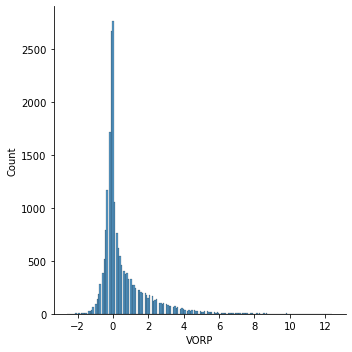

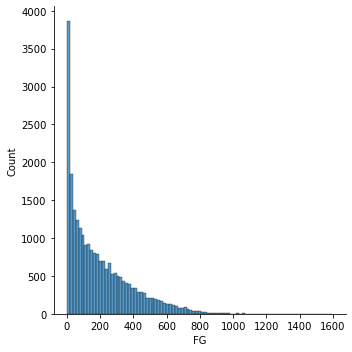

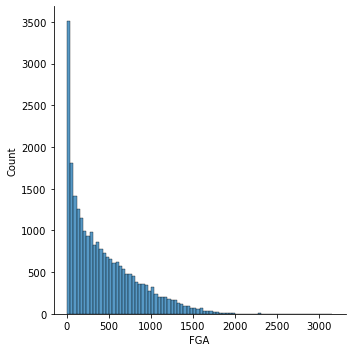

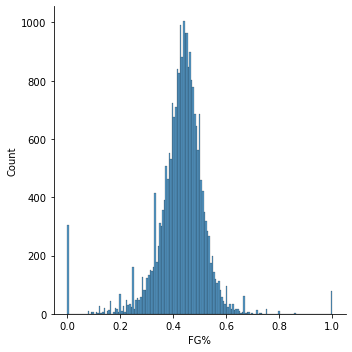

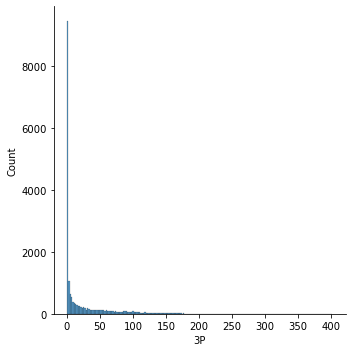

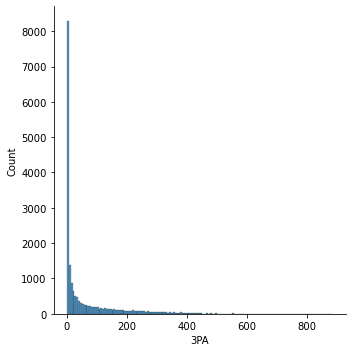

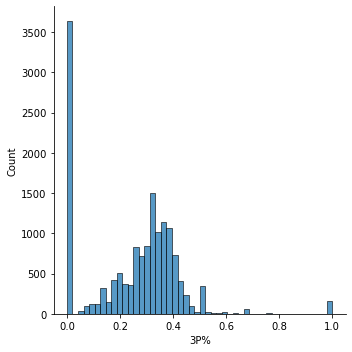

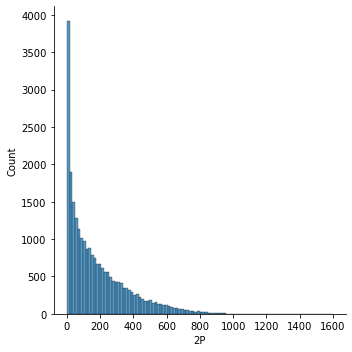

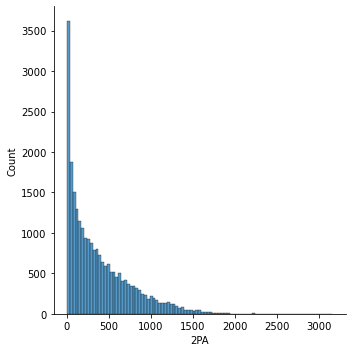

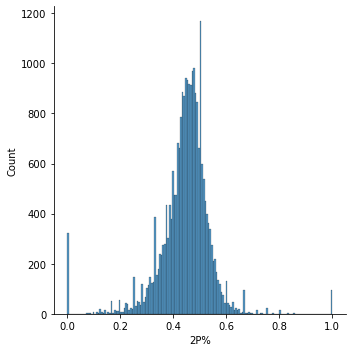

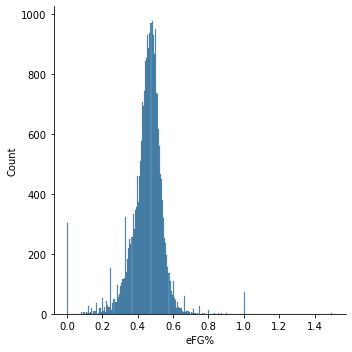

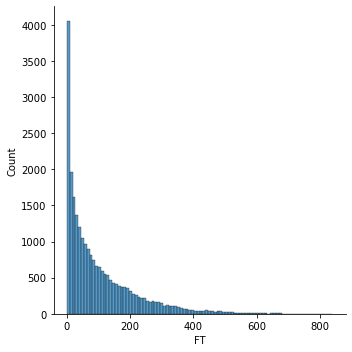

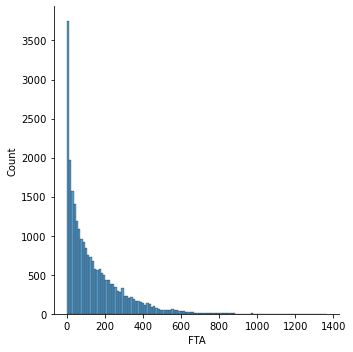

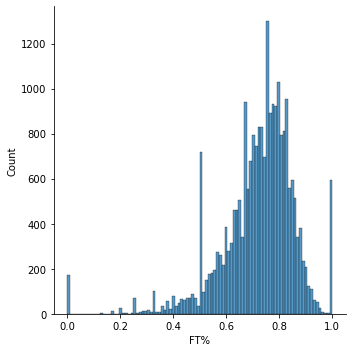

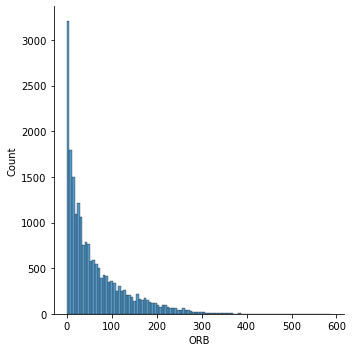

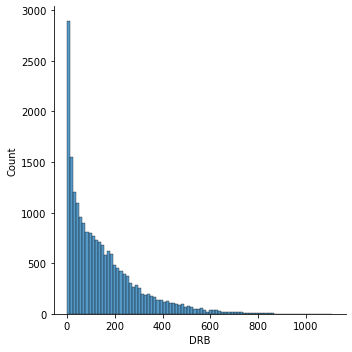

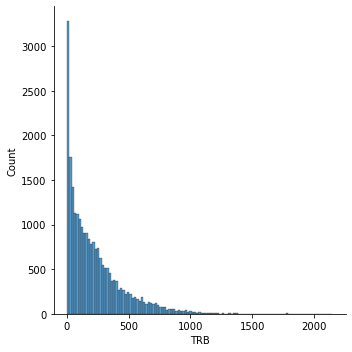

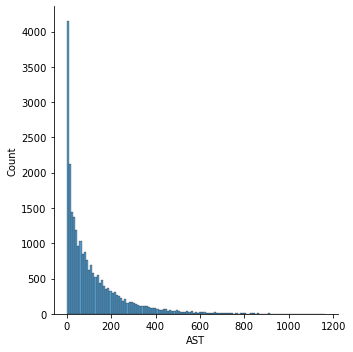

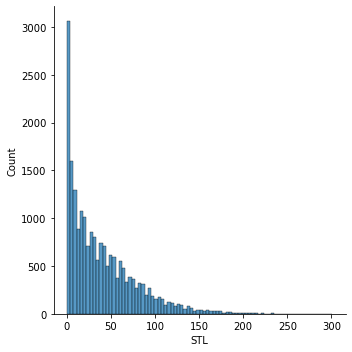

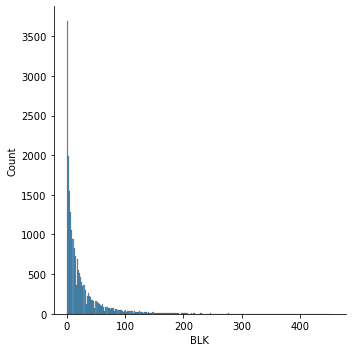

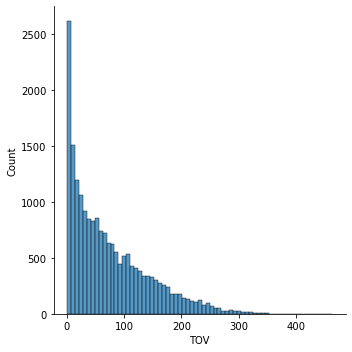

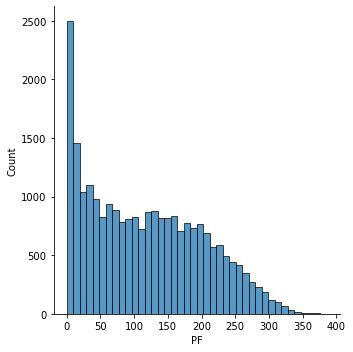

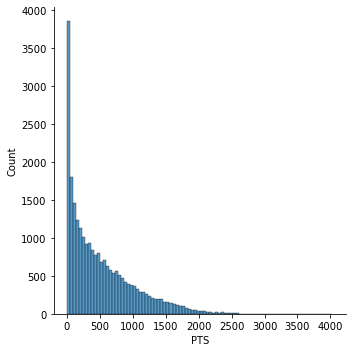

In [246]:
for i in numeric_data:
    sns.displot(df, x=i)

### Primer Test d'Hipòtesis

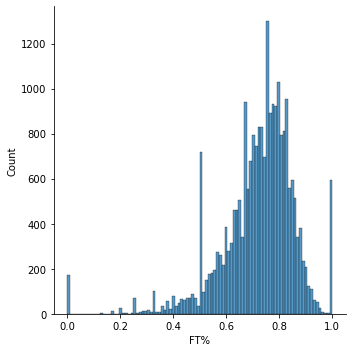

In [252]:
# La variable que ens interessa per provar la nostra hipòtesis és la del percentatge de tirs lliures:
sns.displot(df, x='FT%', discrete=False)

In [248]:
df['FT%'].value_counts(ascending=False)

0.000    772
0.333    175
0.250    171
0.500    151
0.286    144
        ... 
0.829      1
0.811      1
0.831      1
0.047      1
0.672      1
Name: FTr, Length: 936, dtype: int64

In [249]:
df['FTA'].value_counts()

0.0      858
2.0      627
4.0      415
6.0      340
8.0      283
        ... 
732.0      1
739.0      1
860.0      1
670.0      1
686.0      1
Name: FTA, Length: 806, dtype: int64

In [250]:
df['FT'].value_counts()

0.0      1031
2.0       550
1.0       455
3.0       401
4.0       348
         ... 
623.0       1
478.0       1
833.0       1
613.0       1
835.0       1
Name: FT, Length: 650, dtype: int64

In [271]:
df_FT = pd.DataFrame(df[['Year','FTA', 'FT', 'FT%']])

In [272]:
df_FT.isna().sum()

Year     67
FTA      67
FT       67
FT%     925
dtype: int64

In [273]:
df_FT.describe()

Year           FTA            FT           FT%
count  24624.000000  24624.000000  24624.000000  23766.000000
mean    1992.594989    136.775219    102.389336      0.719279
std       17.429594    146.078918    113.373565      0.141824
min     1950.000000      0.000000      0.000000      0.000000
25%     1981.000000     27.000000     18.000000      0.657000
50%     1996.000000     88.000000     63.000000      0.743000
75%     2007.000000    201.000000    149.000000      0.808000
max     2017.000000   1363.000000    840.000000      1.000000

In [274]:
# Per trobar la mitjana de tirs lliures encertats per jugador hem d'eliminar aquells jugadors que no tinguin cap
# intent ('FTA') registrat.

In [275]:
df_FT

Year    FTA     FT    FT%
0      1950.0  241.0  170.0  0.705
1      1950.0  106.0   75.0  0.708
2      1950.0  129.0   90.0  0.698
3      1950.0   34.0   19.0  0.559
4      1950.0   31.0   17.0  0.548
...       ...    ...    ...    ...
24686  2017.0  196.0  133.0  0.679
24687  2017.0   39.0   22.0  0.564
24688  2017.0    5.0    3.0  0.600
24689  2017.0   40.0   31.0  0.775
24690  2017.0   49.0   32.0  0.653

[24691 rows x 4 columns]

In [276]:
df_FT.index

RangeIndex(start=0, stop=24691, step=1)

In [277]:
index = df_FT[(df_FT['FTA'] == 0)].index
df_FT.drop(index, inplace=True)

In [278]:
df_FT.shape

(23833, 4)

In [279]:
df_FT['FTA']

0        241.0
1        106.0
2        129.0
3         34.0
4         31.0
         ...  
24686    196.0
24687     39.0
24688      5.0
24689     40.0
24690     49.0
Name: FTA, Length: 23833, dtype: float64

In [281]:
# Seleccionem només els jugadors que hagin llençat un mínim de 10 tirs lliures, per limitar els casos particulars.
df_FT = df_FT[df_FT['FTA'] > 9]

In [283]:
df_FT.shape

(21286, 4)

In [282]:
df_FT

Year    FTA     FT    FT%
0      1950.0  241.0  170.0  0.705
1      1950.0  106.0   75.0  0.708
2      1950.0  129.0   90.0  0.698
3      1950.0   34.0   19.0  0.559
4      1950.0   31.0   17.0  0.548
...       ...    ...    ...    ...
24685  2017.0   86.0   45.0  0.523
24686  2017.0  196.0  133.0  0.679
24687  2017.0   39.0   22.0  0.564
24689  2017.0   40.0   31.0  0.775
24690  2017.0   49.0   32.0  0.653

[21286 rows x 4 columns]

In [285]:
df_FT['FTA'].value_counts()

10.0     239
12.0     224
13.0     182
14.0     182
16.0     175
        ... 
875.0      1
699.0      1
674.0      1
709.0      1
904.0      1
Name: FTA, Length: 796, dtype: int64

In [286]:
# Creem la nostra pròpia variable de precentatge d'encerts per assegurar-nos que aquesta no inclou els jugadors que no n'han
# llençat cap.

df_FT['percent'] = df_FT['FT']/df_FT['FTA']

<ipython-input-286-5624cbe67f05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FT['percent'] = df_FT['FT']/df_FT['FTA']


In [287]:
df_FT.sample(frac = 0.2).describe()

Year          FTA           FT          FT%      percent
count  4257.000000  4257.000000  4257.000000  4257.000000  4257.000000
mean   1992.010336   157.585154   118.238666     0.726825     0.726816
std      17.611084   144.518140   113.648175     0.112336     0.112341
min    1950.000000    10.000000     3.000000     0.214000     0.214286
25%    1980.000000    48.000000    34.000000     0.667000     0.666667
50%    1995.000000   113.000000    81.000000     0.745000     0.745192
75%    2007.000000   224.000000   166.000000     0.806000     0.805970
max    2017.000000   972.000000   833.000000     1.000000     1.000000

In [288]:
len(df_FT.sample(30))

30

In [289]:
df_FT.describe()

Year           FTA            FT           FT%       percent
count  21286.000000  21286.000000  21286.000000  21286.000000  21286.000000
mean    1991.974678    157.677722    118.090388      0.727855      0.727849
std       17.551906    146.495626    114.236202      0.111385      0.111384
min     1950.000000     10.000000      0.000000      0.000000      0.000000
25%     1980.000000     47.000000     33.000000      0.667000      0.666667
50%     1995.000000    112.000000     81.000000      0.745000      0.745305
75%     2007.000000    224.000000    167.000000      0.806000      0.806452
max     2017.000000   1363.000000    840.000000      1.000000      1.000000

In [290]:
grp_year = df_FT.groupby(['Year'])

In [291]:
df_70s = df_FT[df_FT['Year'].between(1970,1979)]
df_80s = df_FT[df_FT['Year'].between(1980,1989)]
df_90s = df_FT[df_FT['Year'].between(1990,1999)]
df_00s = df_FT[df_FT['Year'].between(2000,2009)]
df_10s = df_FT[df_FT['Year'].between(2010,2019)]

In [292]:
df_70s.describe()

Year          FTA           FT          FT%      percent
count  2606.000000  2606.000000  2606.000000  2606.000000  2606.000000
mean   1974.983116   176.781658   133.089409     0.733370     0.733365
std       2.858751   149.665850   117.073962     0.100233     0.100232
min    1970.000000    10.000000     3.000000     0.194000     0.193548
25%    1972.000000    60.000000    42.000000     0.679000     0.678571
50%    1975.000000   136.000000   100.000000     0.747000     0.747253
75%    1978.000000   250.000000   190.000000     0.806000     0.806038
max    1979.000000   865.000000   677.000000     1.000000     1.000000

In [293]:
df_80s.describe()

Year          FTA           FT          FT%      percent
count  3382.000000  3382.000000  3382.000000  3382.000000  3382.000000
mean   1984.627439   172.930810   130.924009     0.735556     0.735551
std       2.910200   149.413767   118.267189     0.102829     0.102821
min    1980.000000    10.000000     4.000000     0.278000     0.277778
25%    1982.000000    57.000000    40.000000     0.683250     0.683386
50%    1985.000000   130.000000    96.000000     0.750000     0.750000
75%    1987.000000   248.000000   187.000000     0.806000     0.806452
max    1989.000000   972.000000   833.000000     1.000000     1.000000

In [294]:
df_90s.describe()

Year          FTA           FT          FT%      percent
count  4174.000000  4174.000000  4174.000000  4174.000000  4174.000000
mean   1994.632487   149.120029   111.246047     0.725368     0.725369
std       2.855168   137.951798   107.317167     0.114004     0.114006
min    1990.000000    10.000000     2.000000     0.200000     0.200000
25%    1992.000000    44.000000    31.000000     0.667000     0.666667
50%    1995.000000   105.000000    74.000000     0.740000     0.740362
75%    1997.000000   213.000000   160.000000     0.805000     0.805256
max    1999.000000   925.000000   696.000000     1.000000     1.000000

In [295]:
df_00s.describe()

Year          FTA           FT          FT%      percent
count  4579.000000  4579.000000  4579.000000  4579.000000  4579.000000
mean   2004.625027   141.816991   106.938415     0.731300     0.731293
std       2.861411   138.911845   109.112940     0.116345     0.116346
min    2000.000000    10.000000     0.000000     0.000000     0.000000
25%    2002.000000    41.000000    29.000000     0.671000     0.670809
50%    2005.000000    96.000000    70.000000     0.750000     0.750000
75%    2007.000000   195.000000   146.000000     0.812000     0.811904
max    2009.000000   972.000000   696.000000     1.000000     1.000000

In [296]:
df_10s.describe()

Year          FTA           FT          FT%      percent
count  3947.000000  3947.000000  3947.000000  3947.000000  3947.000000
mean   2013.525209   122.942995    93.210793     0.733315     0.733311
std       2.290057   121.910794    97.394184     0.121709     0.121706
min    2010.000000    10.000000     1.000000     0.083000     0.083333
25%    2011.000000    37.000000    26.000000     0.667000     0.666667
50%    2014.000000    84.000000    61.000000     0.756000     0.756098
75%    2016.000000   168.000000   126.000000     0.819000     0.819444
max    2017.000000   916.000000   756.000000     1.000000     1.000000

In [301]:
df_FT = df_FT[df_FT['percent'].notna()]

In [302]:
df_FT['percent'].isna().sum()

0

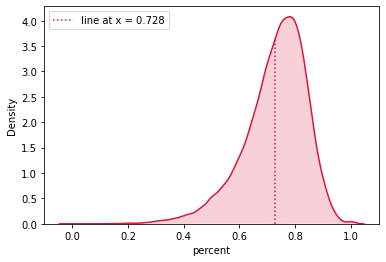

In [303]:
x = df_FT['percent']
mean = round(x.mean(), 3)

ax = sns.kdeplot(x, shade=False, color='crimson')
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)

ax.vlines(mean, 0, height, color='crimson', ls=':', label='line at x = {}'.format(mean))
ax.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)

plt.legend()
plt.show()

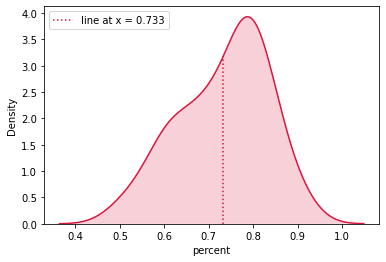

In [708]:
x = df_FT['percent'].sample(50, random_state = 0)
mean = round(x.mean(), 3)

ax = sns.kdeplot(x, shade=False, color='crimson')
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)

ax.vlines(mean, 0, height, color='crimson', ls=':', label='line at x = {}'.format(mean))
ax.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)

plt.legend()
plt.show()


##### Similarity test entre la mitjana d'encerts de tirs lliures de la població i de la mostra fent servir Z-test

This is a classic example of a similarity test (Z-test in this case) where we want to check whether the sample is similar to the population or not.

Difference between Z-test and t-test :

Z-test is used when sample size is large (n > 50), or the population variance is known.
t-test is used when sample size is small (n < 50) and population variance is unknown.

In [328]:
round(df_FT.describe(),3)

Year        FTA         FT        FT%    percent    z-score
count  21286.000  21286.000  21286.000  21286.000  21286.000  21286.000
mean    1991.975    157.678    118.090      0.728      0.728     -0.126
std       17.552    146.496    114.236      0.111      0.111      1.071
min     1950.000     10.000      0.000      0.000      0.000     -7.125
25%     1980.000     47.000     33.000      0.667      0.667     -0.715
50%     1995.000    112.000     81.000      0.745      0.745      0.041
75%     2007.000    224.000    167.000      0.806      0.806      0.629
max     2017.000   1363.000    840.000      1.000      1.000      2.490

In [329]:
df_ft_s = df_FT.sample(50, random_state = 0)

In [330]:
round(df_ft_s.describe(),3)

Year      FTA       FT     FT%  percent  z-score
count    50.000   50.000   50.000  50.000   50.000   50.000
mean   1990.680  208.040  155.000   0.733    0.733   -0.075
std      17.484  193.852  147.569   0.099    0.099    0.954
min    1950.000   10.000    5.000   0.500    0.500   -2.317
25%    1979.000   73.000   58.250   0.664    0.664   -0.740
50%    1993.500  174.500  120.500   0.756    0.756    0.147
75%    2005.750  247.250  180.250   0.800    0.799    0.562
max    2016.000  904.000  737.000   0.913    0.913    1.651

- $\mu$ = 0.728 (<i>Population Mean</i>)   
- $\sigma$ = 0.111 (<i>Population Standard Deviation</i>)   
- $\bar{x}$ = 0.733 (<i>Sample Mean</i>)   
- $n$ = 50 (<i>Sample Size</i>) 
- $alpha$ = 0.05

We know the population mean</span>, standard deviation</span> and the sample size</span> is over <b>30</b>, which means we will be using the <b>Z-test</b></span>.

Form the two possible Hypothesis conditions :

- $(\:H_0\:)\:$ $=$ 0.728, la mitjana de la mostra és igual a la mitjana de la població.
- $(\:H_A\:)\:$ $\neq$ 0.728, la mitjana de la mostra és diferent a la mitjana de la població.
$%$    

Calculate the Standard Error $\:(\:SE_{\bar{x}}\:)$</span> using its equation :   
$%$   

\begin{align*}SE_{\bar{x}}\hspace{2mm}=\hspace{2mm}\frac{\sigma}{\sqrt{n}}\hspace{2mm}=\hspace{2mm}\frac{0.111}{\sqrt{50}}\hspace{2mm}=\hspace{2mm}0.016\end{align*}   
$%$   
Calculate the Z-Score</span> using the Z-score equation :   
$%$   
\begin{align*}Z\:=\: \frac{Point\:Estimate\: - \:Null\:Value}{SE_{Point\:Estimate}}\:=\: \frac{\:\bar{x}\: - \:Null\:Value}{SE_{\bar{x}}}\:=\:\frac{\:0.733\: - \:0.728\:}{0.016}\:=\:0.319\end{align*}   
$%$   


<b>Z-Score</b></span> comes out to be <b>0.319</b>.

In [703]:
x = 0.733
mu = 0.728
sigma = 0.111
n = 50
alpha = 0.05
SE = (sigma/np.sqrt(n))

x_z_score = (x - mu) / SE
print('Standard Error (SE) of the Point Estimate = ',  round(SE, 3))
print('Z-score = ',  round(x_z_score, 3))
print('alpha value = ',  round(alpha, 3))

Standard Error (SE) of the Point Estimate =  0.016
Z-score =  0.319
alpha value =  0.05


In [704]:
from scipy.integrate import quad

def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

x_z_score

x_z_score_percentile, _ = quad(normalProbabilityDensity, np.NINF, x_z_score)

print('Point Estimate Z-score Probability: ', round(x_z_score_percentile, 4))

Point Estimate Z-score Probability:  0.625


El valor 0.625 representa la 'probabilitat total' d'obtenir un resultat 'inferior al de la mitjana de la mostra, x = 0.733, respecte a la distribució de la població. 

In [705]:
p_value = (1 - x_z_score_percentile)
print('p-value = ', round(p_value, 4))

p-value =  0.375


The value 0.375 represents the "total probability" of getting a result "greater than the sample mean,   x = 0.733, with respect to the population distribution.

Contrastant les hipòtesis:

In [707]:
alpha
print('p-value ', round(p_value, 4), '>', round(alpha, 4), 'alpha value')

p-value  0.375 > 0.05 alpha value


- A <b><u>large p-value$\:$ >$\:$ 0.05</u></b></span> indicates <b>weak evidence against</b> the null hypothesis $H_0$</span>, so we <u>fail to reject</u> the null hypothesis $H_0$</span>.   
$%$   
Since the p-value (0.375)</span> is <b>higher than</b> the standard confidence level, alpha = 0.05</span>, we fail to <b>reject</b> the Null hypothesis</span> that the <b>Sample mean</b> is equal to <b>0.728</b>, the Null Hypothesis</span> $\:H_0\::$ $\:\mu = 0.728$. 
 

There isn't sufficient evidence to say there is a difference in average free throws between the sample mean and the population mean.

### Nivell 2
#### Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos atributs del conjunt de dades.  
Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Analitzarem si hi ha una diferència entre la mitjana de l'encert de triples fa 30 anys (1987) i les últimes dades disponibles (2017),  fent servir un paired data t-test.

#### Diferència entre dues mitjanes

The  Null Hypothesis</span> represents the case of no difference between the groups :

-  $H_0:\hspace{2mm}\mu_1\:-\:\mu_2\:=\:0\:$</span>,$\hspace{5mm}$There is no difference in average triples for NBA players from 30 years ago and the actual players (2017)
-  $H_A:\hspace{2mm}\mu_1\:-\:\mu_2\:\neq\:0\:$</span>,$\hspace{5mm}$There is some difference in average triples for NBA players from 30 years ago and the actual players (2017) 
$%$ 

Where $\mu_1$ = Average triples of NBA players from 1987  
and $\mu_2$ = Average triples of NBA players from 2017

In [649]:
len(df)

21180

In [650]:
# Eliminem totes les files en que els jugadors no hagin intentat cap tir de 3:
df = df[df['3PA'] != 0]

In [651]:
len(df)

21180

In [652]:
df['3PA'].value_counts()

1.0      1664
2.0      1036
3.0       723
4.0       556
5.0       408
         ... 
435.0       1
529.0       1
558.0       1
552.0       1
466.0       1
Name: 3PA, Length: 552, dtype: int64

In [653]:
# Filtrem per any, primer les dades del 1987:
filt_87 = df['Year'] == 1987
df_87 = df[filt_87]

In [654]:
df_87.head()

Unnamed: 0    Year                Player Pos   Age   Tm     G    GS      MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  blanl  OWS  DWS   WS  WS/48  blank2  OBPM  DBPM  BPM  VORP     FG     FGA    FG%    3P    3PA    3P%     2P     2PA    2P%   eFG%     FT    FTA    FT%    ORB    DRB    TRB    AST   STL   BLK    TOV     PF     PTS  s17
8302        8302  1987.0  Kareem Abdul-Jabbar*   C  39.0  LAL  78.0  78.0  2441.0  17.9  0.597  0.003  0.345   7.4  15.8  11.9  11.6   0.9   2.2  14.0  22.1    NaN  4.5  3.0  7.5  0.148     NaN   1.2   0.4  1.6   2.2  560.0   993.0  0.564   1.0    3.0  0.333  559.0   990.0  0.565  0.564  245.0  343.0  0.714  152.0  371.0  523.0  203.0  49.0  97.0  186.0  245.0  1366.0  NaN
8303        8303  1987.0           Alvan Adams   C  32.0  PHO  68.0  40.0  1690.0  14.6  0.546  0.002  0.275   6.2  16.1  11.2  18.4   1.7   1.3  16.7  20.0    NaN  1.2  1.6  2.8  0.079     NaN  -0.4   0.7  0.3   1.0  311.0   618.0  0.503   0.0    1.0  0.000  311.0   617.0  0.504  0.503  134.0  170.0  0.788   91.0  247.0  338.0  223.0  62.0  37.0  139.0  207.0   756.0  NaN
8304        8304  1987.0         Michael Adams  PG  24.0  WSB  63.0   0.0  1303.0  14.3  0.506  0.260  0.316   3.0   7.0   5.0  25.7   3.1   0.3  15.3  16.3    NaN  1.2  1.5  2.7  0.099     NaN   0.6  -0.1  0.4   0.8  160.0   393.0  0.407  28.0  102.0  0.275  132.0   291.0  0.454  0.443  105.0  124.0  0.847   38.0   85.0  123.0  244.0  85.0   6.0   81.0   88.0   453.0  NaN
8305        8305  1987.0        Rafael Addison  SF  22.0  PHO  62.0  12.0   711.0  11.9  0.500  0.151  0.193   6.6  10.1   8.4   9.1   1.8   0.6  13.1  23.6    NaN -0.1  0.5  0.4  0.024     NaN  -2.1  -2.4 -4.4  -0.4  146.0   331.0  0.441  16.0   50.0  0.320  130.0   281.0  0.463  0.465   51.0   64.0  0.797   41.0   65.0  106.0   45.0  27.0   7.0   54.0   75.0   359.0  NaN
8306        8306  1987.0          Mark Aguirre  SF  27.0  DAL  80.0  80.0  2663.0  22.1  0.560  0.094  0.350   7.5   9.8   8.7  15.7   1.5   0.6  10.6  31.3    NaN  6.8  2.1  8.9  0.160     NaN   4.4  -1.6  2.8   3.2  787.0  1590.0  0.495  53.0  150.0  0.353  734.0  1440.0  0.510  0.512  429.0  557.0  0.770  181.0  246.0  427.0  254.0  84.0  30.0  217.0  243.0  2056.0  NaN

In [655]:
# Les dades del 2017
filt_17 = df['Year'] == 2017
df_17 = df[filt_17]

In [656]:
df_17.head()

Unnamed: 0    Year        Player Pos   Age   Tm     G    GS      MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  blanl  OWS  DWS   WS  WS/48  blank2  OBPM  DBPM   BPM  VORP     FG    FGA    FG%    3P    3PA    3P%     2P    2PA    2P%   eFG%     FT    FTA    FT%    ORB    DRB    TRB   AST   STL   BLK    TOV     PF    PTS  s17
24096       24096  2017.0  Alex Abrines  SG  23.0  OKC  68.0   6.0  1055.0  10.1  0.560  0.724  0.144   1.9   7.1   4.5   5.5   1.7   0.6   8.3  15.9    NaN  1.2  0.9  2.1  0.095     NaN  -0.3  -2.2  -2.5  -0.1  134.0  341.0  0.393  94.0  247.0  0.381   40.0   94.0  0.426  0.531   44.0   49.0  0.898   18.0   68.0   86.0  40.0  37.0   8.0   33.0  114.0  406.0  NaN
24097       24097  2017.0    Quincy Acy  PF  26.0  TOT  38.0   1.0   558.0  11.8  0.565  0.529  0.353   3.9  18.0  11.0   4.9   1.2   2.0   9.7  16.8    NaN  0.5  0.5  0.9  0.082     NaN  -1.8  -1.2  -3.0  -0.1   70.0  170.0  0.412  37.0   90.0  0.411   33.0   80.0  0.413  0.521   45.0   60.0  0.750   20.0   95.0  115.0  18.0  14.0  15.0   21.0   67.0  222.0  NaN
24098       24098  2017.0    Quincy Acy  PF  26.0  DAL   6.0   0.0    48.0  -1.4  0.355  0.412  0.176   4.6  15.2   9.7   0.0   0.0   0.0   9.8  20.0    NaN -0.2  0.0 -0.1 -0.133     NaN -10.1  -6.0 -16.2  -0.2    5.0   17.0  0.294   1.0    7.0  0.143    4.0   10.0  0.400  0.324    2.0    3.0  0.667    2.0    6.0    8.0   0.0   0.0   0.0    2.0    9.0   13.0  NaN
24099       24099  2017.0    Quincy Acy  PF  26.0  BRK  32.0   1.0   510.0  13.1  0.587  0.542  0.373   3.8  18.2  11.1   5.4   1.3   2.2   9.6  16.5    NaN  0.6  0.5  1.1  0.102     NaN  -1.1  -0.7  -1.8   0.0   65.0  153.0  0.425  36.0   83.0  0.434   29.0   70.0  0.414  0.542   43.0   57.0  0.754   18.0   89.0  107.0  18.0  14.0  15.0   19.0   58.0  209.0  NaN
24100       24100  2017.0  Steven Adams   C  23.0  OKC  80.0  80.0  2389.0  16.5  0.589  0.002  0.392  13.0  15.5  14.2   5.4   1.8   2.6  16.0  16.2    NaN  3.3  3.1  6.4  0.130     NaN  -0.7   1.2   0.5   1.5  374.0  655.0  0.571   0.0    1.0  0.000  374.0  654.0  0.572  0.571  157.0  257.0  0.611  282.0  333.0  615.0  86.0  88.0  78.0  146.0  195.0  905.0  NaN

In [657]:
len(df_87)

303

In [658]:
len(df_17)

549

In [659]:
# Mirem els valors nulls:
df_87['3P%'].isna().sum()

0

In [660]:
df_17['3P%'].isna().sum()

0

In [661]:
# Eliminem els valors nuls dels dos df:
df_87 = df_87[df_87['3P%'].notna()]

In [662]:
df_17 = df_17[df_17['3P%'].notna()]

In [663]:
df_87['3P%'].isna().sum()

0

In [664]:
df_17['3P%'].isna().sum()

0

In [665]:
len(df_87)

303

In [666]:
len(df_17)

549

In [667]:
df_87 = df_87.sample(30, random_state = 2)

In [668]:
df_17 = df_17.sample(30, random_state = 2)

In [669]:
df_87['3P%'].describe()

count    30.000000
mean      0.160833
std       0.148810
min       0.000000
25%       0.000000
50%       0.163500
75%       0.284500
max       0.387000
Name: 3P%, dtype: float64

In [670]:
df_17['3P%'].describe()

count    30.000000
mean      0.306567
std       0.140053
min       0.000000
25%       0.254250
50%       0.346500
75%       0.380250
max       0.667000
Name: 3P%, dtype: float64

In [685]:
mean = df_87.mean() - df_17.mean()

In [686]:
mean

2P           NaN
2P%          NaN
2PA          NaN
3P           NaN
3P%          NaN
3PA          NaN
3PAr         NaN
AST          NaN
AST%         NaN
Age          NaN
BLK          NaN
BLK%         NaN
BPM          NaN
DBPM         NaN
DRB          NaN
DRB%         NaN
DWS          NaN
FG           NaN
FG%          NaN
FGA          NaN
FT           NaN
FT%          NaN
FTA          NaN
FTr          NaN
G            NaN
GS           NaN
MP           NaN
OBPM         NaN
ORB          NaN
ORB%         NaN
OWS          NaN
PER          NaN
PF           NaN
PTS          NaN
STL          NaN
STL%         NaN
TOV          NaN
TOV%         NaN
TRB          NaN
TRB%         NaN
TS%          NaN
USG%         NaN
Unnamed: 0   NaN
VORP         NaN
WS           NaN
WS/48        NaN
Year         NaN
blank2       NaN
blanl        NaN
eFG%         NaN
s17          NaN
s87          NaN
dtype: float64

In [673]:
df_87.reset_index(drop=True, inplace=True)

In [674]:
s87_3P = df_87['3P%']

In [675]:
s87_3P

0     0.387
1     0.280
2     0.275
3     0.000
4     0.379
5     0.250
6     0.000
7     0.250
8     0.000
9     0.202
10    0.000
11    0.000
12    0.294
13    0.100
14    0.000
15    0.286
16    0.000
17    0.125
18    0.000
19    0.333
20    0.333
21    0.000
22    0.000
23    0.000
24    0.000
25    0.250
26    0.365
27    0.278
28    0.118
29    0.320
Name: 3P%, dtype: float64

In [676]:
df_17.reset_index(drop=True, inplace=True)

In [677]:
df_17['s87'] = s87_3P

In [678]:
df_17 = df_17[['3P%', 's87']]

In [679]:
# No em surten els valors del 87 perquè l'índex és diferent, encara que tingui la mateixa llargada de dades.
df_17.head()

3P%    s87
0  0.413  0.387
1  0.211  0.280
2  0.200  0.275
3  0.406  0.000
4  0.366  0.379

In [680]:
df_17

3P%    s87
0   0.413  0.387
1   0.211  0.280
2   0.200  0.275
3   0.406  0.000
4   0.366  0.379
5   0.367  0.250
6   0.143  0.000
7   0.370  0.250
8   0.360  0.000
9   0.000  0.202
10  0.000  0.000
11  0.300  0.000
12  0.283  0.294
13  0.217  0.100
14  0.382  0.000
15  0.000  0.286
16  0.409  0.000
17  0.290  0.125
18  0.341  0.000
19  0.267  0.333
20  0.411  0.333
21  0.347  0.000
22  0.415  0.000
23  0.667  0.000
24  0.372  0.000
25  0.346  0.250
26  0.375  0.365
27  0.291  0.278
28  0.250  0.118
29  0.398  0.320

In [681]:
df_17['s17'] = df_17['3P%']

In [682]:
df_17.drop(['3P%'], axis = 1, inplace = True)

In [683]:
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

rp.summary_cont(df_17)

Variable     N    Mean      SD      SE  95% Conf.  Interval
0      s87  30.0  0.1608  0.1488  0.0272     0.1053    0.2164
1      s17  30.0  0.3066  0.1401  0.0256     0.2543    0.3589

What is the point estimate</span> of the population difference, $\:\mu_1\:-\:\mu_2\:$ ?   

The difference in sample means</span> is a good point estimate :</span>   

\begin{align*}\bar{x}_{1}\:-\:\bar{x}_{2}\:=\:0.161\:-\:0.307\:=\:-0.146\end{align*}

In [687]:
x_1 = df_17['s87'].mean()
x_2 = df_17['s17'].mean()

x_point_estimate = (x_1 - x_2)
round(x_point_estimate,3)

-0.146

Compute the standard error</span> of the point estimate</span> of the population difference, $\:\mu_1\:-\:\mu_2\:$.

In [690]:
round(df_17.std(),2)

s87    0.15
s17    0.14
dtype: float64

\begin{align*}\:SE_{\bar{x}_{\bar{x}_{1}−\bar{x}_{2}}}\hspace{2mm}=\hspace{2mm}{\sqrt{\frac{s^{2}_{1}}{n_1}\:+\:\frac{s^{2}_{2}}{n_2}}}\hspace{4mm}=\hspace{2mm}{\sqrt{\frac{0.15^{2}}{30}\:+\:\frac{0.14^{2}}{30}}}\hspace{4mm}= \hspace{4mm}0.037\end{align*}   

Compute the p-value</span> of the <b>hypothesis test</b>, and evaluate the hypotheses using a significance level of $\:\alpha\:$ = 0.05</span>.   

We start by computing the <b>T-score</b></span> :

\begin{align*}T\:=\: \frac{Point\:Estimate\: - \:Null\:Value}{SE_{Point\:Estimate}}\:=\:\frac{\:−0.146\: - \:0\:}{0.037}\:=\:-3.94\end{align*}   

In [694]:
x = x_point_estimate
NullVal = 0
SE = 0.037

x_Ttest = (x - NullVal)/SE
round(x_Ttest,2)

-3.94

In [701]:
from scipy.integrate import quad

def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

x_Ttest

x_Ttest_percentile, _ = quad(normalProbabilityDensity, np.NINF, x_Ttest)

print('Point Estimate T-score Probability :', round(x_Ttest_percentile, 5), ' p-value :', round((1-x_Ttest_percentile), 5))

Point Estimate T-score Probability : 4e-05  p-value : 0.99996


### Nivell 3
#### Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades.  
Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Busquem si hi ha una diferència en l'encert de triples tenint en compte les diferents posicions. Farem servir la variable '3P%' per això.

- Point Guard-(PG)
- Shooting Guard-(SG)
- Small Forward-(SF)
- Power Forward-(PF)
- Center-(C)

- $H_0\:$</span>: The average triple percentage is equal across the five positions. 
- $H_A\:$</span>: The average triple percentage varies across some (or all) groups.

The Statistical notation for the <b>null hypothesis</b></span> is the following :   
$%$   
\begin{align*}\mu_{PG}\hspace{2mm}=\hspace{2mm}\mu_{SG}\hspace{2mm}=\hspace{2mm}\mu_{SF}\hspace{2mm}=\hspace{2mm}\mu_{PF}\hspace{2mm}\hspace{2mm}=\hspace{2mm}\mu_{C}\hspace{2mm}\end{align*}</span> 

In [348]:
df.describe().transpose()

count         mean         std       min       25%       50%       75%       max
Year   24624.0  1992.594989   17.429594  1950.000  1981.000  1996.000  2007.000  2017.000
Age    24616.0    26.664405    3.841892    18.000    24.000    26.000    29.000    44.000
G      24624.0    50.837110   26.496161     1.000    27.000    58.000    75.000    88.000
GS     18233.0    23.593375   28.632387     0.000     0.000     8.000    45.000    83.000
MP     24138.0  1209.720317  941.146575     0.000   340.000  1053.000  1971.000  3882.000
PER    24101.0    12.479071    6.039014   -90.600     9.800    12.700    15.600   129.100
TS%    24538.0     0.493001    0.094469     0.000     0.458     0.506     0.544     1.136
3PAr   18839.0     0.158604    0.187495     0.000     0.005     0.064     0.288     1.000
FTr    24525.0     0.325455    0.218971     0.000     0.208     0.296     0.400     6.000
ORB%   20792.0     6.181565    4.872685     0.000     2.600     5.400     9.000   100.000
DRB%   20792.0    13.708657    6.636402     0.000     8.800    12.700    18.100   100.000
TRB%   21571.0     9.949210    5.040283     0.000     5.900     9.200    13.500   100.000
AST%   22555.0    13.009962    9.191843     0.000     6.500    10.500    17.600   100.000
STL%   20792.0     1.648269    1.017024     0.000     1.100     1.500     2.100    24.200
BLK%   20792.0     1.410624    1.773348     0.000     0.300     0.900     1.900    77.800
TOV%   19582.0    15.085099    6.919170     0.000    11.400    14.200    17.700   100.000
USG%   19640.0    18.906492    5.448157     0.000    15.400    18.600    22.200   100.000
OWS    24585.0     1.257307    2.136256    -5.100    -0.100     0.400     1.900    18.300
DWS    24585.0     1.227395    1.269613    -1.000     0.200     0.800     1.800    16.000
WS     24585.0     2.485796    3.058638    -2.800     0.200     1.400     3.800    25.400
WS/48  24101.0     0.065002    0.102471    -2.519     0.031     0.075     0.115     2.123
OBPM   20797.0    -1.778386    3.792947   -73.800    -3.400    -1.500     0.300    47.800
DBPM   20797.0    -0.548570    2.253106   -30.400    -1.700    -0.500     0.700    46.800
BPM    20797.0    -2.326720    4.691619   -86.700    -4.200    -1.800     0.300    36.200
VORP   20797.0     0.559879    1.336892    -2.600    -0.200     0.000     0.900    12.400
FG     24624.0   195.325820  188.114361     0.000    41.000   141.000   299.000  1597.000
FGA    24624.0   430.645752  397.624715     0.000    99.000   321.000   661.000  3159.000
FG%    24525.0     0.430817    0.095921     0.000     0.393     0.439     0.480     1.000
3P     18927.0    22.215037   38.543366     0.000     0.000     2.000    27.000   402.000
3PA    18927.0    63.604480  102.442769     0.000     1.000    11.000    84.000   886.000
3P%    15416.0     0.248796    0.176683     0.000     0.100     0.292     0.363     1.000
2P     24624.0   178.250447  179.478923     0.000    35.000   122.000   268.000  1597.000
2PA    24624.0   381.756782  371.260335     0.000    82.000   270.000   579.250  3159.000
2P%    24496.0     0.445343    0.099803     0.000     0.407     0.456     0.496     1.000
eFG%   24525.0     0.450658    0.099200     0.000     0.414     0.463     0.501     1.500
FT     24624.0   102.389336  113.373565     0.000    18.000    63.000   149.000   840.000
FTA    24624.0   136.775219  146.078918     0.000    27.000    88.000   201.000  1363.000
FT%    23766.0     0.719279    0.141824     0.000     0.657     0.743     0.808     1.000
ORB    20797.0    62.189210   67.324881     0.000    12.000    38.000    91.000   587.000
DRB    20797.0   147.199404  145.921912     0.000    33.000   106.000   212.000  1111.000
TRB    24312.0   224.637381  228.190203     0.000    51.000   159.000   322.000  2149.000
AST    24624.0   114.852623  135.863913     0.000    19.000    68.000   160.000  1164.000
STL    20797.0    39.897052   38.713053     0.000     9.000    29.000    60.000   301.000
BLK    20797.0    24.470260   36.935084     0.000

C:\Users\ab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='3P%', ylabel='Density'>

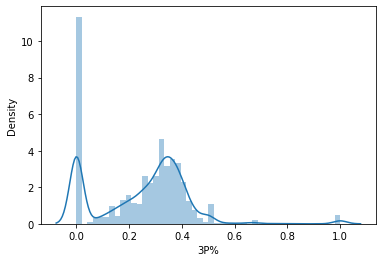

In [349]:
sns.distplot(df['3P%'])

In [730]:
df['3PA'].value_counts()

1.0      1664
2.0      1036
3.0       723
4.0       556
5.0       408
         ... 
435.0       1
529.0       1
558.0       1
552.0       1
466.0       1
Name: 3PA, Length: 552, dtype: int64

In [350]:
df['3P%'].value_counts()

0.000    3638
0.333     591
0.250     417
0.500     336
0.200     330
0.167     245
0.286     181
1.000     160
0.400     160
0.143     146
0.222     128
0.375     124
0.300     116
0.364     107
0.125     101
0.308      96
0.357      90
0.273      89
0.313      86
0.111      83
0.385      78
0.360      72
0.231      70
0.429      69
0.341      69
0.348      69
0.267      68
0.345      66
0.368      65
0.324      65
0.389      65
0.371      64
0.361      64
0.353      63
0.182      63
0.370      62
0.367      62
0.100      60
0.351      60
0.356      59
0.350      58
0.667      58
0.365      57
0.346      56
0.321      56
0.338      56
0.362      55
0.214      55
0.154      55
0.340      54
0.294      54
0.380      54
0.347      53
0.316      53
0.390      53
0.387      51
0.318      51
0.359      51
0.355      50
0.304      50
0.391      50
0.378      50
0.310      50
0.393      49
0.379      49
0.320      49
0.373      49
0.292      49
0.386      48
0.417      48
0.337      48
0.330 

In [353]:
len(df['3PA'])

24691

In [352]:
len(df['3P%'])

24691

In [339]:
df.Pos.value_counts()

PF       4966
SG       4811
C        4759
SF       4699
PG       4648
G         139
F         123
F-C        81
G-F        79
F-G        60
C-F        35
C-PF       33
SF-SG      30
PG-SG      28
PF-C       27
SG-PG      27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
SF-PG       1
PG-SF       1
Name: Pos, dtype: int64

In [340]:
df_pos = df[['Pos', '3P%']]

In [344]:
df_pos.groupby('Pos').mean()

3P%
Pos            
C      0.131914
C-F         NaN
C-PF   0.090882
C-SF   0.340000
F           NaN
F-C         NaN
F-G         NaN
G           NaN
G-F         NaN
PF     0.193695
PF-C   0.152000
PF-SF  0.257368
PG     0.287677
PG-SF  0.342000
PG-SG  0.303444
SF     0.274305
SF-PF  0.245944
SF-PG       NaN
SF-SG  0.313074
SG     0.296053
SG-PF  0.338667
SG-PG  0.328273
SG-SF  0.327500

In [712]:
#Eliminem valors nuls
df_pos = df_pos[df_pos['3P%'].notna()]

In [713]:
df_pos.isna().sum()

Pos    0
3P%    0
dtype: int64

In [714]:
len(df_pos)

15416

In [715]:
df_pos.groupby('Pos').mean()

3P%
Pos            
C      0.131914
C-PF   0.090882
C-SF   0.340000
PF     0.193695
PF-C   0.152000
PF-SF  0.257368
PG     0.287677
PG-SF  0.342000
PG-SG  0.303444
SF     0.274305
SF-PF  0.245944
SF-SG  0.313074
SG     0.296053
SG-PF  0.338667
SG-PG  0.328273
SG-SF  0.327500

In [716]:
df_pos['Pos'].value_counts()

PG       3584
SG       3510
SF       3257
PF       2915
C        1976
SF-SG      27
PG-SG      27
SG-SF      24
SG-PG      22
PF-SF      19
SF-PF      18
C-PF       17
PF-C       15
SG-PF       3
C-SF        1
PG-SF       1
Name: Pos, dtype: int64

Agafem les 5 posicions que ens interessen, les que tenen més registres, que alhora són les fonamentals:
- Point Guard-(PG)
- Shooting Guard-(SG)
- Small Forward-(SF)
- Power Forward-(PF)
- Center-(C)

In [721]:
counts = df_pos['Pos'].value_counts()
df_pos = df_pos.loc[df_pos['Pos'].isin(counts.index[counts > 1000])]

In [722]:
df_pos['Pos'].value_counts()

PG    3584
SG    3510
SF    3257
PF    2915
C     1976
Name: Pos, dtype: int64

In [731]:
round(df_pos.groupby(['Pos']).describe(),3)

3P%                                             
      count   mean    std  min    25%    50%    75%  max
Pos                                                     
C    1976.0  0.132  0.214  0.0  0.000  0.000  0.250  1.0
PF   2915.0  0.194  0.200  0.0  0.000  0.200  0.333  1.0
PG   3584.0  0.288  0.140  0.0  0.222  0.317  0.369  1.0
SF   3257.0  0.274  0.155  0.0  0.200  0.314  0.371  1.0
SG   3510.0  0.296  0.142  0.0  0.238  0.329  0.377  1.0

In [736]:
rp.summary_cont(df_pos['3P%']).round(3)

Variable        N   Mean     SD     SE  95% Conf.  Interval
0      3P%  15242.0  0.249  0.177  0.001      0.246     0.251

In [737]:
rp.summary_cont(df_pos['3P%'].groupby(df_pos['Pos'])).round(3)

N   Mean     SD     SE  95% Conf.  Interval
Pos                                                
C    1976  0.132  0.214  0.005      0.122     0.141
PF   2915  0.194  0.200  0.004      0.186     0.201
PG   3584  0.288  0.140  0.002      0.283     0.292
SF   3257  0.274  0.155  0.003      0.269     0.280
SG   3510  0.296  0.142  0.002      0.291     0.301

In [773]:
df_poss,_= train_test_split(df_pos, test_size = 0.9, stratify=df_pos['Pos'])

In [774]:
df_poss

Pos    3P%
23902  PF  0.316
19548  SG  0.303
19372  PG  0.143
24161  SF  0.229
6166   SF  0.000
...    ..    ...
24043   C  0.214
7814   PG  0.000
22402  PG  0.424
16012  SG  0.351
6851   SG  0.389

[1524 rows x 2 columns]

In [775]:
rp.summary_cont(df_poss['3P%'].groupby(df_poss['Pos'])).round(3)

N   Mean     SD     SE  95% Conf.  Interval
Pos                                               
C    198  0.149  0.246  0.018      0.114     0.184
PF   291  0.217  0.218  0.013      0.192     0.242
PG   358  0.286  0.145  0.008      0.271     0.301
SF   326  0.281  0.158  0.009      0.264     0.298
SG   351  0.291  0.155  0.008      0.275     0.308

In [784]:
tstats, pvalue = stats.f_oneway(df_poss['3P%'][df_poss['Pos'] == 'C'], 
                                df_poss['3P%'][df_poss['Pos'] == 'PF'],
                                df_poss['3P%'][df_poss['Pos'] == 'PG'], 
                                df_poss['3P%'][df_poss['Pos'] == 'SF'],
                                df_poss['3P%'][df_poss['Pos'] == 'SG'])

print('t-statistics value = ', tstats.round(3), ' p-value = ', pvalue.round(4) )

t-statistics value =  28.123  p-value =  0.0


#Com va el tema de les mostres amb demostrar la hipòtesis? No puc agafar totes les dades disponibles?
#La mitja de la població? --> Treballar com si només tinguéssim una mostra.

#Mostres independents i depenedents? la mitjana de la població? o la desviació estandard? com les obtenim?
#- Potser podem comparar el percentatge fa 50 anys i ara, assumint que serà superior ara.

#Perquè no m'ha funcionat el one sample t-test. --> perquè ho esytava fent amb totes les variables del df, i la mostra ha de ser inferior a 50
#És una hipòtesi massa cutre. 

#Fer noves hipòtesis, no rallar-se amb fer-ne amb 2 i 3 variables. Anar fent hipòtesis encadenades i també per practicar.
Entendre els diferents tests.

In [ ]:
# Exercici 2: revisar resultats p-value i t-test. preguntar àlex.
# Netejar, treure allò que no cal.
# Exercici 3: acabar l'ANOVA, entendre millor. Fer un sample primer? Stratificar?